<a href="https://colab.research.google.com/github/CorleoneAppolonia/PMP-2024/blob/main/Lab10/ex_laborator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

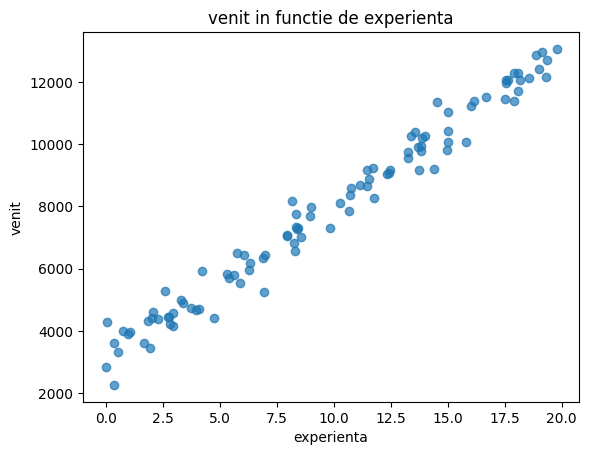

Output()

Output()

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,493.574,7.823,478.988,509.417,0.244,0.173,1031.0,1047.0,1.0
b,3098.281,89.165,2918.461,3269.825,2.958,2.092,907.0,1022.0,1.0
eps,453.020,31.654,391.484,515.532,0.943,0.669,1135.0,989.0,1.0
mu[0],7214.905,47.096,7125.037,7309.333,1.217,0.861,1501.0,1629.0,1.0
mu[1],10208.948,58.283,10094.444,10319.580,1.353,0.957,1872.0,1581.0,1.0
...,...,...,...,...,...,...,...,...,...
mu[95],5438.088,60.398,5318.634,5555.591,1.878,1.328,1031.0,1190.0,1.0
mu[96],12015.972,79.295,11866.612,12169.683,2.059,1.457,1487.0,1453.0,1.0
mu[97],8761.345,47.588,8667.579,8854.250,1.028,0.727,2129.0,1393.0,1.0
mu[98],3126.616,88.780,2947.549,3297.478,2.945,2.083,907.0,1022.0,1.0


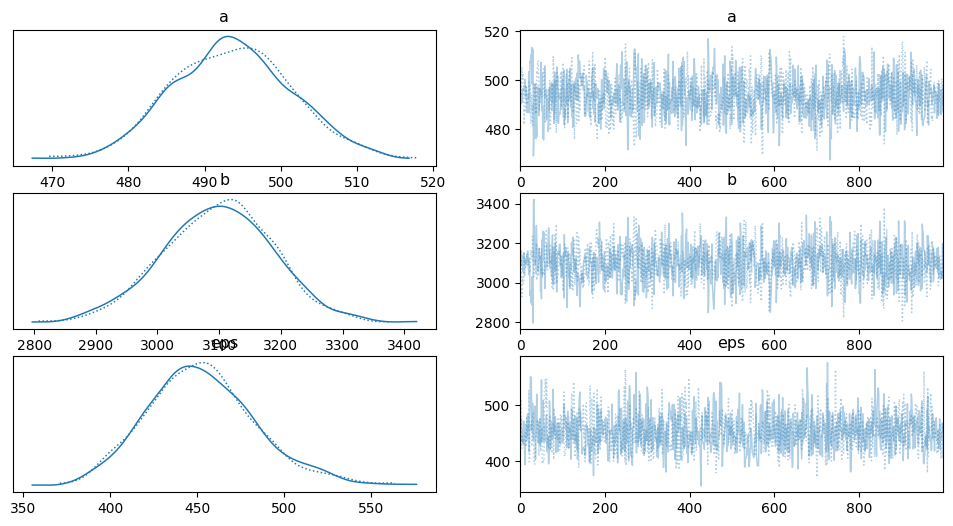

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm

np.random.seed(1)
N = 100
x = np.random.uniform(0, 20, N)
a = 500
b = 3000
eps = np.random.normal(0, 500, N)

y = a * x + b + eps

plt.scatter(x, y, alpha=0.7)
plt.title('venit in functie de experienta')
plt.xlabel('experienta')
plt.ylabel('venit')
plt.show()


with pm.Model() as model:
    a = pm.Normal('a', mu=0, sigma=500)
    b = pm.Normal('b', mu=0, sigma=1000)
    eps = pm.HalfCauchy('eps', 100)

    mu = pm.Deterministic('mu', a * x + b)

    y_pred = pm.Normal('y_pred', mu=mu, sigma=eps, observed=y)

    trace = pm.sample(1000, tune=2000, return_inferencedata=True)

pm.plot_trace(trace, var_names=['a', 'b', 'eps'])
pm.summary(trace, hdi_prob=0.95)